In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pylab as plb
import generic_Sobol_computation as genS

In [4]:
test_array = np.zeros(10)
test_array[test_array>=0] = 1
test_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
import otmorris
import openturns as ot
import openturns.viewer as otv

In [88]:
M = 10000
lbd_samples = np.array([[np.random.default_rng().uniform(0.1,0.3) for _ in range(2)] for _ in range(M)])
lbd_samples_v = np.array([[np.random.default_rng().uniform(0.1,0.3) for _ in range(2)] for _ in range(M)])
#lbd_samples = np.array([[draw_lbd[tr_index]() for tr_index in range(len(parameter_list))] for _ in range(M)])
#lbd_samples_v = np.array([[draw_lbd[tr_index]() for tr_index in range(len(parameter_list))] for _ in range(M)])
for index in [0]:
    lbd_samples_v[:,index] = lbd_samples[:,index].copy()
full_lbd_samples = np.concatenate((lbd_samples,lbd_samples_v))

In [89]:
p_f = np.array([genS.true_failure_proba(*lbd_sample) for lbd_sample in full_lbd_samples])
argsorted_p = np.argsort(p_f)

In [90]:
frozen_indices = argsorted_p[3:-3].tolist()
picked_indices = np.concatenate([argsorted_p[:3],argsorted_p[-3:]]).tolist()

In [91]:
def Sobol_pick_freeze_analytical(p_f):
    """
    Pick freeze with true failure probabilities in the analytical case
    """
    S = ((1/M)*np.sum([p_f[i]*p_f[i+M]  for i in range(M)])-(1/M)*np.sum([p_f[i] for i in range(M)])* (1/M)*np.sum([p_f[i+M]  for i in range(M)]))/ ((1/M)*np.sum([p_f[i]**2 for i in range(M)])- ((1/M)*np.sum([p_f[i]  for i in range(M)]))**2)
    return [S]

In [92]:
ot_Sobol = ot.PythonFunction(2*M,1,Sobol_pick_freeze_analytical)
ot_function = ot.ParametricFunction(ot_Sobol,frozen_indices,p_f[frozen_indices].tolist())

In [119]:
print(np.mean(p_f))
print(np.min(p_f))

2.2690472763725108e-05
1.6653228927679397e-11


In [124]:
# Number of trajectories
r = 100

# Define experiments in [0,1]^3
# p-levels
p = 10
# dimension
dim = 6

bounds=ot.Interval((p_f[picked_indices]-0.1*p_f[picked_indices]).tolist(),(p_f[picked_indices]+0.1*p_f[picked_indices]).tolist())
#bounds=ot.Interval((p_f[picked_indices]-0.9*np.mean(p_f)).tolist(),(p_f[picked_indices]+0.9*np.min(p_f)).tolist())
# Definition of Morris experiment
morris_experiment = otmorris.MorrisExperimentGrid([p]*dim,bounds,r)
X = morris_experiment.generate()

In [125]:
# Evaluation of function
Y = ot_function(X)
morris = otmorris.Morris(X, Y, bounds)

In [126]:
# Evaluate Elementary effects (ee)
ee = otmorris.Morris(X, Y,bounds)
mean = ee.getMeanAbsoluteElementaryEffects()
sigma = ee.getStandardDeviationElementaryEffects()
print('mu*',mean)
print('sigma',sigma)

mu* [1.64902e-11,1.78473e-11,5.61553e-11,0.000104726,7.04138e-05,0.000111877]
sigma [1.43279e-15,1.35791e-15,1.01004e-15,1.11986e-15,9.24505e-16,9.92646e-16]


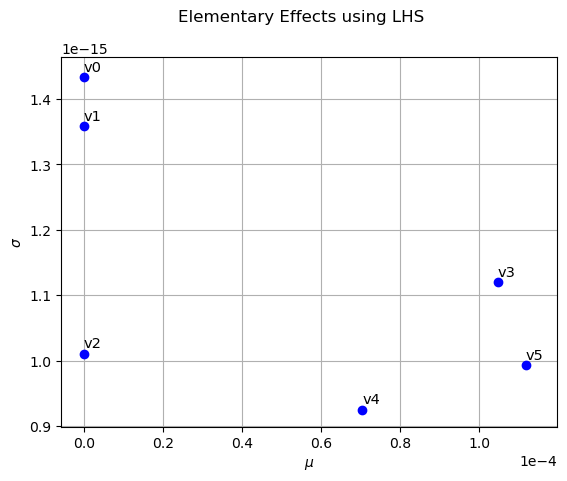

In [127]:
# Graph of sensitivities

graph = morris.drawElementaryEffects(0)
graph.setTitle("Elementary Effects using LHS")
view = otv.View(graph)

otv.View.ShowAll()

In [76]:
test = np.array([2,4,6])
test2 = np.array([2,2,3])
np.concatenate((test,test2))

array([2, 4, 6, 2, 2, 3])

In [70]:
g_array = [[1,2,3],[2,3,4]]
def up(g):
    g+=[np.array([1,2,3])]
    return
up(g_array)
print(g_array)

[[1, 2, 3], [2, 3, 4], array([1, 2, 3])]


In [62]:
def normal_pdf(x,y,mu1,mu2,sig1,sig2):
    return 1/(2*np.pi*sig1*sig2)*np.exp(-0.5*(((x-mu1)/sig1)**2)+((y-mu2)/sig2)**2)

In [36]:
mu0,sigma0 = [100.60382423,21.96685914], [[12.4455025,0],[0,17.25629839]]
mu1,sigma1 = [99.48925818,12.63087771], [[5.93191065,0],[0,10.92102331]] 
mu2,sigma2 = [111.81088976,7.14992239], [[12.88959722,0],[0,6.08554193]] 
mu3,sigma3 = [89.18181859,31.27404458], [[3.92116051,0],[0,8.2255556]] 

In [38]:
sigma0[0][0]

12.4455025

In [65]:
x = np.linspace(0,200,200)
y = np.linspace(0,200,200)
X,Y = np.meshgrid(x,y)
Z0 = normal_pdf(X,Y,mu0[0],mu0[1],sigma0[0][0],sigma0[1][1])
Z1 = normal_pdf(X,Y,mu1[0],mu1[1],sigma1[0][0],sigma1[1][1])
Z2 = normal_pdf(X,Y,mu2[0],mu2[1],sigma2[0][0],sigma2[1][1])
Z3 = normal_pdf(X,Y,mu3[0],mu3[1],sigma3[0][0],sigma3[1][1])

C:\Users\jo.mboko\AppData\Local\Temp\ipykernel_16892\2854426743.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(2*np.pi*sig1*sig2)*np.exp(-0.5*(((x-mu1)/sig1)**2)+((y-mu2)/sig2)**2)


In [57]:
def line(x):
    return -200 + 2*x
x_line = np.linspace(100, x.max(), 500)
y_line = line(x_line)

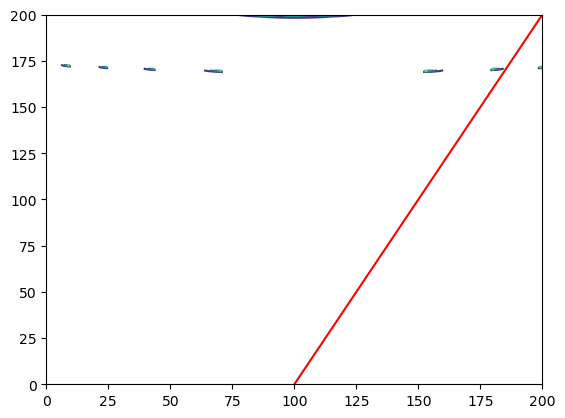

In [66]:
plt.plot(x_line, y_line, color='red', label='-2x - y = -200')
plt.contour(X, Y, Z0, cmap='viridis')
plt.contour(X, Y, Z1, cmap='viridis')
plt.contour(X, Y, Z2, cmap='viridis')
plt.contour(X, Y, Z3, cmap='viridis')
plt.show()

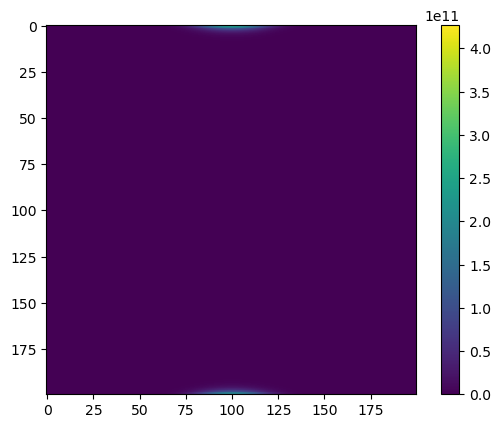

In [49]:
im = plb.imshow(Z0)
plb.colorbar(im)
plb.show()

In [72]:
am = ackley_function.AckleyModel()
am.dim = 10

In [3]:

def Ackley(x):
    a = 20
    b = 0.2
    c = 2*np.pi
    d = 10
    square_sum = np.sum([x_i**2 for x_i in x])
    cos_sum = np.sum([np.cos(c*x_i) for x_i in x])
    return -a*np.exp(-b*np.sqrt(1/d*square_sum))-np.exp(1/d*cos_sum)+a+np.exp(1)

mini1 = np.array([10]*10)
mini2 = np.array([30,20,10,30,20,10,30,20,10,30])
mini3 = np.array([10,30,20,10,30,20,10,30,20,10])
test_function = lambda x: Ackley(1e-3*(x-mini1))+Ackley(1e-3*(x-mini2))+Ackley(1e-3*(x-mini3))

In [11]:

def Ackley2(x,y):
    a = 20
    b = 0.2
    c = 2*np.pi
    return -a*np.exp(-b*np.sqrt(0.5*(x**2+y**2)))-np.exp(0.5*(np.cos(c*x)+np.cos(c*y)))+a+np.exp(1)

In [79]:
def normal_pdf(x,y,mu1,mu2,sig1,sig2):
    return 1/(2*np.pi*sig1*sig2)*np.exp(-0.5*(((x-mu1)/sig1)**2)+((y-mu1)/sig2)**2)
    

In [101]:
test_function2 = lambda x,y: -normal_pdf(x,y,5,90,30,20)

In [6]:
test_function2 = lambda x,y: -2*x-y

In [3]:
x = np.linspace(0,100,100)
y = np.linspace(0,100,100)
X,Y = np.meshgrid(x,y)
#res = test_function2([])

In [7]:
Z = test_function2(X,Y)

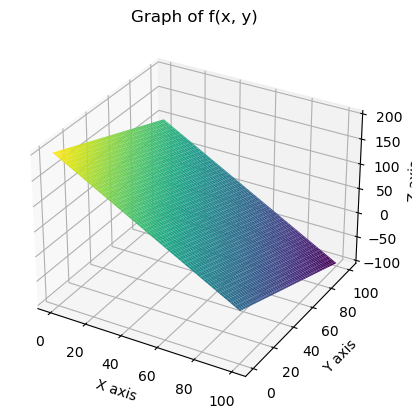

In [8]:
# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Graph of f(x, y)')

# Show the plot
plt.show()

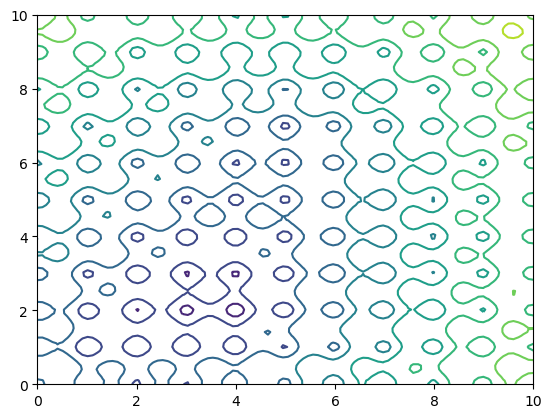

In [26]:
plt.contour(X,Y,Z)

In [123]:
test_function(np.zeros(10))

0.2683070388449109

In [102]:
np.random.random(10)

array([0.40928589, 0.24891607, 0.20223475, 0.52907609, 0.10148702,
       0.25782438, 0.30426428, 0.89308144, 0.37852828, 0.21769908])

In [111]:
test_function(np.random.random(10))

0.25893235951338545

In [ ]:
def Ackley(x):
    a = 20
    b = 0.2
    c = 2*np.pi
    d = 10
    square_sum = np.sum([x_i**2 for x_i in x])
    cos_sum = np.sum([np.cos(c*x_i) for x_i in x])
    return -a*np.exp(-b*np.sqrt(1/d*square_sum))-np.exp(1/d*cos_sum)+a+np.exp(1)

RuntimeError: InvalidDimensionException : Input point has incorrect dimension. Got 10. Expected 2

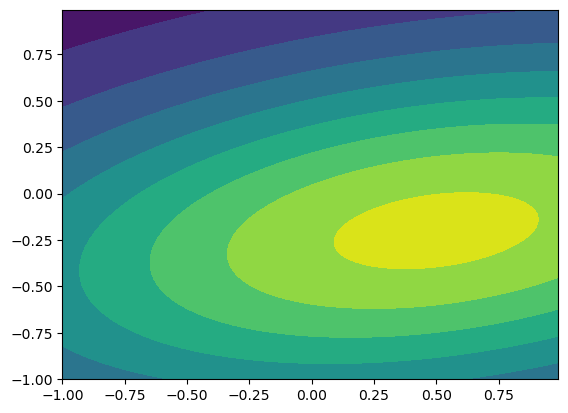

In [10]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]

pos = np.dstack((x, y))

rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])

fig2 = plt.figure()

ax2 = fig2.add_subplot(111)

ax2.contourf(x, y, rv.pdf(pos))

In [43]:
A1 = np.random.rand(10, 10)
cov1 = np.dot(A1, A1.transpose())
A2 = np.random.rand(10, 10)
cov2 = np.dot(A2, A2.transpose())
A3 = np.random.rand(10, 10)
cov3 = np.dot(A3, A3.transpose())

mu1 = np.random.rand(10)*5
mu2 = np.random.rand(10)*5
mu3 = np.random.rand(10)*5

In [44]:
normal1 = multivariate_normal(mu1, cov1)
normal2 = multivariate_normal(mu2, cov2)
normal3 = multivariate_normal(mu3, cov3)

In [45]:
test_function = lambda x: normal1.pdf(x)+normal2.pdf(x)+normal3.pdf(x)

In [59]:
test_function(np.random.rand(10))

3.298261809912274e-46

In [62]:
test_function(mu3)

0.04760314709608873